In [3]:
from owslib.wcs import WebCoverageService
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt

In [ ]:
sc_bbox_coords = [31, -83, 35.2, -78]
sc_bbox_grid = [3445000, -9223000, 3911000, -8667000] #meters
sc_x_m = (-9223000, -8667000) # meters
sc_y_m = (3911000, 3445000) # meters
sc_x = (-9223000 / 250), (-8667000 / 250) # grid cells (didn't work for slicing)
sc_y = 3445000 / 250, 3911000 / 250 # grid cells (didn't work for slicing)



(-36892.0, -34668.0)
(13780.0, 15644.0)


In [16]:
bdod_wcs = WebCoverageService('https://maps.isric.org/mapserv?map=/map/bdod.map')

print([op.name for op in bdod_wcs.operations]) 


['GetCapabilities', 'DescribeCoverage', 'GetCoverage']


In [6]:
print(list(bdod_wcs.contents))

['bdod_0-5cm_Q0.5', 'bdod_0-5cm_Q0.05', 'bdod_0-5cm_Q0.95', 'bdod_0-5cm_mean', 'bdod_0-5cm_uncertainty', 'bdod_5-15cm_Q0.5', 'bdod_5-15cm_Q0.05', 'bdod_5-15cm_Q0.95', 'bdod_5-15cm_mean', 'bdod_5-15cm_uncertainty', 'bdod_15-30cm_Q0.5', 'bdod_15-30cm_Q0.05', 'bdod_15-30cm_Q0.95', 'bdod_15-30cm_mean', 'bdod_15-30cm_uncertainty', 'bdod_30-60cm_Q0.05', 'bdod_30-60cm_Q0.5', 'bdod_30-60cm_Q0.95', 'bdod_30-60cm_mean', 'bdod_30-60cm_uncertainty', 'bdod_60-100cm_Q0.05', 'bdod_60-100cm_Q0.5', 'bdod_60-100cm_Q0.95', 'bdod_60-100cm_mean', 'bdod_60-100cm_uncertainty', 'bdod_100-200cm_Q0.05', 'bdod_100-200cm_Q0.5', 'bdod_100-200cm_Q0.95', 'bdod_100-200cm_mean', 'bdod_100-200cm_uncertainty']


In [23]:
bdod_0_5_mean = bdod_wcs.contents['bdod_0-5cm_mean']
bdod_0_5_mean.boundingboxes

[{'nativeSrs': 'http://www.opengis.net/def/crs/EPSG/0/152160',
  'bbox': (-19949000.0, -6147500.0, 19861750.0, 8361000.0)}]

In [15]:
bdod_0_5_mean.descCov

<Element {http://www.opengis.net/wcs/2.0}CoverageDescriptions at 0x125f6ba80>

In [ ]:
# Bulk Density 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
# subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage

response = bdod_wcs.getCoverage(
    identifier=['bdod_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/bulk_density_0_5_mean_us2.tif", "wb") as file:
    file.write(response.read())

In [30]:
#Use same method for getting bulk density to get sand, clay, soc

clay_wcs = WebCoverageService("https://maps.isric.org/mapserv?map=/map/clay.map")
sand_wcs = WebCoverageService("https://maps.isric.org/mapserv?map=/map/sand.map")
soc_wcs = WebCoverageService("https://maps.isric.org/mapserv?map=/map/soc.map")

clay_0_5_mean = clay_wcs.contents['clay_0-5cm_mean']
sand_0_5_mean = sand_wcs.contents['sand_0-5cm_mean']
soc_0_5_mean = soc_wcs.contents['soc_0-5cm_mean']

In [ ]:
# Clay 1
 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
#subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage of CONUS

response = clay_wcs.getCoverage(
    identifier=['clay_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/clay_0_5_mean_us1.tif", "wb") as file:
    file.write(response.read())
    

ConnectionError: HTTPSConnectionPool(host='maps.isric.org', port=443): Read timed out.

In [32]:
# Clay 2
 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
# subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage of CONUS

response = clay_wcs.getCoverage(
    identifier=['clay_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/clay_0_5_mean_us2.tif", "wb") as file:
    file.write(response.read())

In [ ]:
# Sand 1
 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
#subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage of CONUS

response = sand_wcs.getCoverage(
    identifier=['sand_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/sand_0_5_mean_us1.tif", "wb") as file:
    file.write(response.read())



In [34]:
# Sand 2
 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
# subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage of CONUS

response = sand_wcs.getCoverage(
    identifier=['sand_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/sand_0_5_mean_us2.tif", "wb") as file:
    file.write(response.read())

In [35]:
# soc 1
 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
#subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage of CONUS

response = soc_wcs.getCoverage(
    identifier=['soc_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/soc_0_5_mean_us1.tif", "wb") as file:
    file.write(response.read())

In [36]:
# soc 2
 
crs = 'http://www.opengis.net/def/crs/EPSG/0/152160'
# subsets = [("X", -13158388, -10582926), ("Y", 2679089, 5640999)]    
subsets = [("X", -10582926, -7582926), ("Y", 2679089, 5640999)]    # Second for coverage of CONUS

response = soc_wcs.getCoverage(
    identifier=['soc_0-5cm_mean'], # needs to be list!
    crs=crs,
    subsets=subsets,
    resx=250, resy=250,
    format='image/tiff',
)

with open("./data/soc_0_5_mean_us2.tif", "wb") as file:
    file.write(response.read())

In [4]:
def compute_soil_properties_xr(bd, sand, clay, soc):
    # Add coarse fragments later to adjust awc in rocky soils. Usually awc * (1 - (cf/100))
    """
    Compute porosity, field capacity, wilting point, and available water capacity using xarray DataArrays.
    All parameters are xarray DataArrays with aligned dimensions and spatial coordinates.
    """
    bd_g_cm3 = bd.astype("float32") / 100
    sand_frac = sand.astype("float32") / 1000
    clay_frac = clay.astype("float32") / 1000
    soc_g_kg = soc.astype("float32") / 10
    om_pct = soc_g_kg * 1.724

    # Particle density of mineral soil in g/cm³
    particle_density = 2.65

    # Porosity
    porosity = 1 - (bd_g_cm3 / particle_density)

    # Field Capacity (volumetric water content at -33 kPa)
    fc = (
        -0.251 * sand_frac
        + 0.195 * clay_frac
        + 0.011 * om_pct
        + 0.006 * sand_frac * om_pct
        - 0.027 * clay_frac * om_pct
        + 0.452
    )

    # Wilting Point (volumetric water content at -1500 kPa)
    wp = (
        -0.024 * sand_frac
        + 0.487 * clay_frac
        + 0.006 * om_pct
        + 0.005 * sand_frac * om_pct
        - 0.013 * clay_frac * om_pct
        + 0.068
    )

    # Available Water Capacity
    awc = fc - wp

    return porosity.clip(0, 1), fc.clip(0, 1), wp.clip(0, 1), awc.clip(0, 1)

In [5]:
bulk_density_1 = rxr.open_rasterio(
    "data/soils/bulk_density_0_5_mean.tif", masked=True
).squeeze()

bulk_density_2 = rxr.open_rasterio(
    "data/soils/bulk_density_0_5_mean_us2.tif", masked=True
).squeeze()


In [6]:
bulk_density_1

<xarray.DataArray (y: 11848, x: 10302)> Size: 488MB
[122058096 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 82kB -1.316e+07 -1.316e+07 ... -1.058e+07
  * y            (y) float64 95kB 5.641e+06 5.641e+06 ... 2.679e+06 2.679e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:       72
    TIFFTAG_YRESOLUTION:       72
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MAXIMUM:        164
    STATISTICS_MEAN:           109.40126078408
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         51.482752039023
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0

In [7]:
sand_1 = rxr.open_rasterio("data/soils/sand_0_5_mean_us1.tif", masked=True).squeeze()
sand_2 = rxr.open_rasterio("data/soils/sand_0_5_mean_us2.tif", masked=True).squeeze()
clay_1 = rxr.open_rasterio("data/soils/clay_0_5_mean_us1.tif", masked=True).squeeze()
clay_2 = rxr.open_rasterio("data/soils/clay_0_5_mean_us2.tif", masked=True).squeeze()
soc_1 = rxr.open_rasterio("data/soils/soc_0_5_mean_us1.tif", masked=True).squeeze()
soc_2 = rxr.open_rasterio("data/soils/soc_0_5_mean_us2.tif", masked=True).squeeze()


In [8]:
print(bulk_density_1.x.min().values, bulk_density_1.x.max().values)
print(bulk_density_2.x.min().values, bulk_density_2.x.max().values)


-13158263.001844302 -10583050.998155698
-10582801.0 -7583051.0


In [9]:
bulk_density = xr.combine_by_coords([bulk_density_1, bulk_density_2], combine_attrs="drop_conflicts")

In [10]:
bulk_density

<xarray.DataArray (y: 11848, x: 22302)> Size: 1GB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(11848, 22302), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 178kB -1.316e+07 -1.316e+07 ... -7.583e+06
  * y            (y) float64 95kB 5.641e+06 5.641e+06 ... 2.679e+06 2.679e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:       72
    TIFFTAG_YRESOLUTION:       72
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MINIMUM:        0
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0

In [11]:
bulk_density_sc = bulk_density.sel(x=slice(-9100000, -9000000), y=slice(3300000, 3400000))

In [13]:
bulk_density_sc

<xarray.DataArray (y: 0, x: 400)> Size: 0B
array([], shape=(0, 400), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -9.1e+06 -9.1e+06 -9.099e+06 ... -9e+06 -9e+06
  * y            (y) float64 0B 
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_XRESOLUTION:       72
    TIFFTAG_YRESOLUTION:       72
    TIFFTAG_RESOLUTIONUNIT:    2 (pixels/inch)
    AREA_OR_POINT:             Area
    STATISTICS_APPROXIMATE:    YES
    STATISTICS_MINIMUM:        0
    STATISTICS_VALID_PERCENT:  100
    scale_factor:              1.0
    add_offset:                0.0

In [14]:
sand = xr.combine_by_coords([sand_1, sand_2], combine_attrs="drop_conflicts")
clay = xr.combine_by_coords([clay_1, clay_2], combine_attrs="drop_conflicts")
soc = xr.combine_by_coords([soc_1, soc_2], combine_attrs="drop_conflicts")

In [15]:
porosity, field_capacity, wilting_point, awc = compute_soil_properties_xr(bulk_density, sand, clay, soc)

In [16]:
field_capacity

<xarray.DataArray (y: 11848, x: 22302)> Size: 1GB
array([[0.452, 0.452, 0.452, ..., 0.452, 0.452, 0.452],
       [0.452, 0.452, 0.452, ..., 0.452, 0.452, 0.452],
       [0.452, 0.452, 0.452, ..., 0.452, 0.452, 0.452],
       ...,
       [0.452, 0.452, 0.452, ..., 0.452, 0.452, 0.452],
       [0.452, 0.452, 0.452, ..., 0.452, 0.452, 0.452],
       [0.452, 0.452, 0.452, ..., 0.452, 0.452, 0.452]],
      shape=(11848, 22302), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 178kB -1.316e+07 -1.316e+07 ... -7.583e+06
  * y            (y) float64 95kB 5.641e+06 5.641e+06 ... 2.679e+06 2.679e+06
    spatial_ref  int64 8B 0

In [17]:
soil_ds = xr.Dataset({"porosity": porosity, "field_capacity": field_capacity, "wilting_point": wilting_point, "available_water_capacity": awc})

In [18]:
soil_ds

<xarray.Dataset> Size: 4GB
Dimensions:                   (x: 22302, y: 11848)
Coordinates:
    band                      int64 8B 1
  * x                         (x) float64 178kB -1.316e+07 ... -7.583e+06
  * y                         (y) float64 95kB 5.641e+06 5.641e+06 ... 2.679e+06
    spatial_ref               int64 8B 0
Data variables:
    porosity                  (y, x) float32 1GB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    field_capacity            (y, x) float32 1GB 0.452 0.452 ... 0.452 0.452
    wilting_point             (y, x) float32 1GB 0.068 0.068 ... 0.068 0.068
    available_water_capacity  (y, x) float32 1GB 0.384 0.384 ... 0.384 0.384

In [19]:
soil_ds_sc = soil_ds.sel(x=slice(-9223000, -8667000), y=slice(3911000, 3445000,))

In [20]:
soil_ds_sc

<xarray.Dataset> Size: 66MB
Dimensions:                   (x: 2224, y: 1864)
Coordinates:
    band                      int64 8B 1
  * x                         (x) float64 18kB -9.223e+06 ... -8.667e+06
  * y                         (y) float64 15kB 3.911e+06 3.911e+06 ... 3.445e+06
    spatial_ref               int64 8B 0
Data variables:
    porosity                  (y, x) float32 17MB 1.0 1.0 1.0 ... 1.0 1.0 1.0
    field_capacity            (y, x) float32 17MB 0.452 0.452 ... 0.452 0.452
    wilting_point             (y, x) float32 17MB 0.068 0.068 ... 0.068 0.068
    available_water_capacity  (y, x) float32 17MB 0.384 0.384 ... 0.384 0.384

In [21]:
soil_ds_sc_5070 = soil_ds_sc.rio.reproject("EPSG:5070")

In [22]:
soil_ds_5070 = soil_ds.rio.reproject("EPSG:5070")

In [27]:
soil_ds_5070['porosity'].attrs


{'_FillValue': nan}

In [24]:
soil_ds_sc_5070 = soil_ds_5070.sel(x=slice(1105065, 1586690), y=slice(1508561, 1046893)) # need to mask this to remove oceans. Probably before doing the calculations

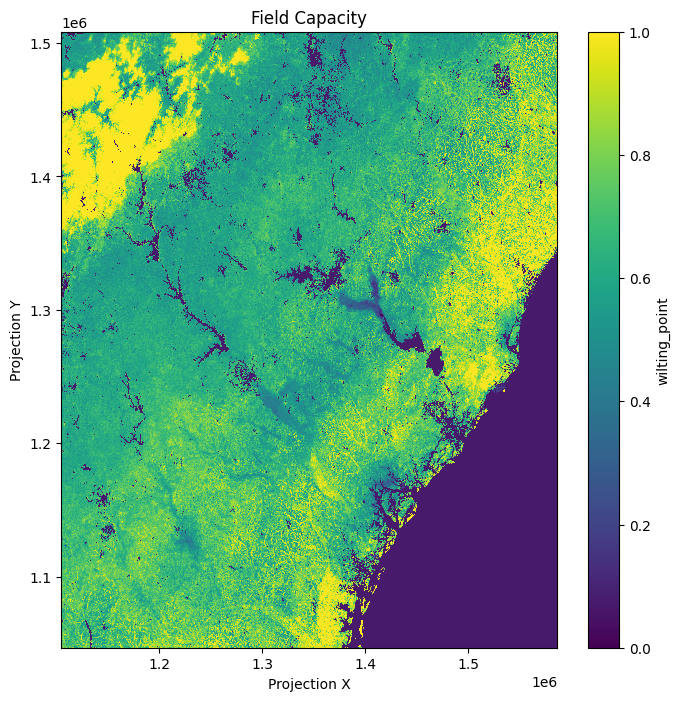

In [39]:
plt.figure(figsize=(8,8))
soil_ds_sc_5070['wilting_point'].plot()
plt.title("Field Capacity")
plt.xlabel("Projection X")
plt.ylabel("Projection Y")
plt.show()

In [ ]:
# soil_ds_5070.to_netcdf("./data/soil_ds_5070.nc") #produced a 5.7GB file!
soil_ds_sc_5070.to_netcdf("./data/soil_ds_5070.nc") #62.4 MB